In [97]:
# pacotes
import pandas as pd
import numpy as np
import os
import openpyxl
from openpyxl import load_workbook
import seaborn as sn
from itertools import permutations, product
import matplotlib.pyplot as mplt

In [ ]:
# setar diretorio dos cadernos
diretorio = r'C:\Users\Computadores Gamer\OneDrive\Área de Trabalho\dados gradilene\dados'
diretorio = diretorio.replace('\\', '/')

os.chdir(diretorio)
os.getcwd()

In [ ]:
##### CONSUMO_ALIMENTAR
# largura do txt
larguras = [2,4,1,9,2,1,2,2,2,4,2,7,3,
            2,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,2,2,7,9,6,14,14,14,14,
            14,14,14,14,14,14,14,14,
            14,14,14,14,14,14,14,14,
            14,14,14,14,14,14,14,14,
            14,14,15,10,15,1]

# nome das colunas
colunas = ["UF", "ESTRATO_POF", "TIPO_SITUACAO_REG",
           "COD_UPA", "NUM_DOM", "NUM_UC",
           "COD_INFOR,MANTE", "QUADRO", "SEQ",
           "V9005", "V9007", "V9001", "V9015",
           "V9016", "V9017", "V9018", "V9019",
           "V9020", "V9021", "V9022", "V9023",
           "V9024", "V9025", "V9026", "V9027",
           "V9028", "V9029", "V9030",
           "COD_UNIDADE_MEDIDA_FINAL",
           "COD_PREPARACAO_FINAL", "GRAMATURA1",
           "QTD", "COD_TBCA", "ENERGIA_KCAL",
           "ENERGIA_KJ", "PTN", "CHOTOT", "FIBRA",
           "LIP", "COLEST", "AGSAT", "AGMONO",
           "AGPOLI", "AGTRANS", "CALCIO", "FERRO",
           "SODIO", "MAGNESIO", "FOSFORO", "POTASSIO",
           "COBRE", "ZINCO", "VITA_RAE", "TIAMINA",
           "RIBOFLAVINA", "NIACINA", "PIRIDOXAMINA",
           "COBALAMINA", "VITD", "VITE", "VITC",
           "FOLATO", "PESO", "PESO_FINAL",
           "RENDA_TOTAL", "DIA_SEMANA", "DIA_ATIPICO"]

# leitura dos dados
CONSUMO_ALIMENTAR = pd.read_fwf(
    os.path.join(diretorio, "CONSUMO_ALIMENTAR.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)

print(CONSUMO_ALIMENTAR.head())

In [ ]:
##### CARACTERISTICAS_DIETA
# largura do txt
larguras = [2,4,1,9,2,1,2,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,3,3,14,15,10]

# nome das colunas
colunas = ["UF", "ESTRATO_POF", "TIPO_SITUACAO_REG",
           "COD_UPA", "NUM_DOM", "NUM_UC",
           "COD_INFORMANTE", "V7101", "V7102",
           "V71031", "V71032", "V71033", "V71034",
           "V71035", "V71036", "V71037", "V71038",
           "V7104", "V71051", "V71052", "V71053",
           "V71054", "V71055", "V71056", "V71A01",
           "V71A02", "V72C01", "V72C02", "PESO",
           "PESO_FINAL", "RENDA_TOTAL"]

# leitura dos dados
CARACTERISTICAS_DIETA = pd.read_fwf(
    os.path.join(diretorio, "CARACTERISTICAS_DIETA.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)

print(CARACTERISTICAS_DIETA.head())


In [ ]:
#### DOMICILIO
# largura do txt
larguras = [2,4,1,9,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,14,14,1]

# nome das colunas
colunas = ["UF", "ESTRATO_POF", "TIPO_SITUACAO_REG",
            "COD_UPA", "NUM_DOM", "V0201", "V0202",
            "V0203", "V0204", "V0205", "V0206", "V0207",
            "V0208", "V0209", "V02101", "V02102",
            "V02103", "V02104", "V02105", "V02111",
            "V02112", "V02113", "V0212", "V0213",
            "V02141", "V02142", "V0215", "V02161",
            "V02162", "V02163", "V02164", "V0217",
            "V0219", "V0220", "V0221", "PESO",
            "PESO_FINAL", "V6199"]

# leitura dos dados
DOMICILIO = pd.read_fwf(
    os.path.join(diretorio, "DOMICILIO.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)

print(DOMICILIO.head())



In [ ]:
##### CONDICOES_VIDA
# largura do txt
larguras = [2,4,1,9,2,1,2,1,6,5,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,14,14,10]

# nome das colunas
colunas = ["UF", "ESTRATO_POF", "TIPO_SITUACAO_REG",
            "COD_UPA", "NUM_DOM", "NUM_UC", "COD_INFORMANTE",
            "V6101", "V6102", "V6103", "V61041", "V61042",
            "V61043", "V61044", "V61045", "V61046",
            "V61051", "V61052", "V61053", "V61054",
            "V61055", "V61056", "V61057", "V61058",
            "V61061", "V61062", "V61063", "V61064",
            "V61065", "V61066", "V61067", "V61068",
            "V61069", "V610610", "V610611", "V61071",
            "V61072", "V61073", "V6108", "V6109",
            "V6110", "V6111", "V6112", "V6113", "V6114",
            "V6115", "V6116", "V6117", "V6118", "V6119",
            "V6120", "V6121", "PESO", "PESO_FINAL",
            "RENDA_TOTAL"]

# leitura dos dados
CONDICOES_VIDA = pd.read_fwf(
    os.path.join(diretorio, "CONDICOES_VIDA.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)

print(CONDICOES_VIDA.head())


In [ ]:
##### MORADOR_QUALI_VIDA
# largura do txt
larguras = [2,4,1,9,2,1,2,20,20,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,1,1,1,2,20,20,14,14]

# nome das colunas
colunas = ["UF","ESTRATO_POF","TIPO_SITUACAO_REG","COD_UPA",
            "NUM_DOM","NUM_UC","COD_INFORMANTE","CONTAGEM_PONDERADA",
            "FUNCAO_PERDA","V201","V202","V204","V205","V206",
            "V207","V208","V209","V210","V211","V212","V214","V215",
            "V216","V217","V301","V302","V303","V304","V305","V306",
            "V307","V308","V401","V402","V403","V501","V502","V503",
            "V504","V505","V506","V601","V602","V603","V604","V605",
            "V606","V607","V608","V609","V610","V611","V701","V702",
            "V703","V704","V801","V802","V901","V902","GRANDE_REGIAO",
            "C1","C2","C3","C4","C5","C6","C7","RENDA_DISP_PC",
            "RENDA_DISP_PC_SS","PESO","PESO_FINAL"]

# leitura dos dados
MORADOR_QUALI_VIDA = pd.read_fwf(
    os.path.join(diretorio, "MORADOR_QUALI_VIDA.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)

print(MORADOR_QUALI_VIDA.head())

In [ ]:
#### MORADOR
# largura do txt
larguras = [2,4,1,9,2,1,2,2,1,2,2,4,3,1,1,
            1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,
            1,1,1,1,1,2,1,1,2,1,1,2,1,1,1,
            2,1,2,14,14,10,1,20,20,20,20]

# nome das colunas
colunas = ["UF", "ESTRATO_POF", "TIPO_SITUACAO_REG",
            "COD_UPA", "NUM_DOM", "NUM_UC", "COD_INFORMANTE",
            "V0306", "V0401", "V04021", "V04022", "V04023",
            "V0403", "V0404", "V0405", "V0406", "V0407",
            "V0408", "V0409", "V0410", "V0411", "V0412",
            "V0413", "V0414", "V0415", "V0416",
            "V041711", "V041712", "V041721", "V041722",
            "V041731", "V041732", "V041741", "V041742",
            "V0418", "V0419", "V0420", "V0421", "V0422",
            "V0423", "V0424", "V0425", "V0426", "V0427",
            "V0428", "V0429", "V0430", "ANOS_ESTUDO",
            "PESO", "PESO_FINAL", "RENDA_TOTAL",
            "NIVEL_INSTRUCAO", "RENDA_DISP_PC","RENDA_MONET_PC",
            "RENDA_NAO_MONET_PC","DEDUCAO_PC" ]

# leitura dos dados
MORADOR = pd.read_fwf(
    os.path.join(diretorio, "MORADOR.txt"),
    widths=larguras,
    na_values=[" "],
    names=colunas,
    decimal="."
)

print(MORADOR.head())


In [ ]:
# var_depend1
# MORADOR['RENDA_MONET_PC']
# menor ou igual a 1/4 de SM = pobre
# acima de 1/4 de SM = não pobre
# SM (2017) = 937 


corte_sm = 937/4

MORADOR['var_depend1'] = pd.Series()

for i in range(len(MORADOR['RENDA_MONET_PC'])):
    if MORADOR['RENDA_MONET_PC'][i] <= corte_sm:
        MORADOR['var_depend1'][i] = 'pobre'
    else:
        MORADOR['var_depend1'][i] = 'não pobre'
        

grafico1 = sn.countplot(MORADOR, x='var_depend1')
print(MORADOR['var_depend1'].value_counts())
        
    
    
    

C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_6308\953452924.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  DOMICILIO['var_depend2'] = pd.Series()
C:\Users\Computadores Gamer\AppData\Local\Temp\ipykernel_6308\953452924.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DOMICILIO['var_depend2'][i] = 'não pobre'


não pobre    34689
pobre        23231
Name: var_depend2, dtype: int64


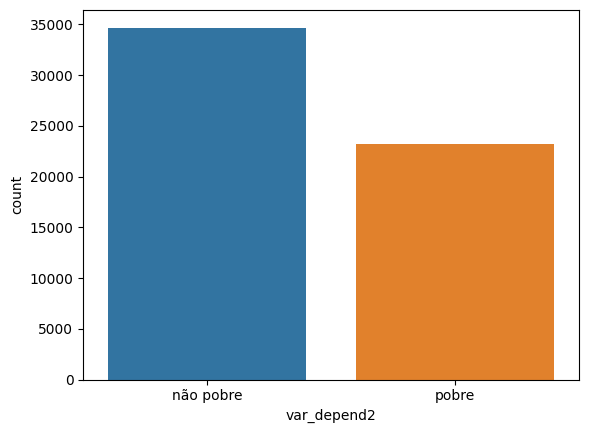

In [105]:

# var_depend2 
# DOMICILIO['V6199']
# 1 – Segurança = não pobre
# 2 – Insegurança leve = pobre
# 3 – Insegurança moderada = pobre
# 4 – Insegurança grave = pobre


DOMICILIO['var_depend2'] = pd.Series()

for i in range(len(DOMICILIO['V6199'])):
    if DOMICILIO['V6199'][i] == 1:
        DOMICILIO['var_depend2'][i] = 'não pobre'
    elif DOMICILIO['V6199'][i]==2:
        DOMICILIO['var_depend2'][i] = 'pobre'
    elif DOMICILIO['V6199'][i]==3:
        DOMICILIO['var_depend2'][i] = 'pobre'
    elif DOMICILIO['V6199'][i]==4:
        DOMICILIO['var_depend2'][i] = 'pobre'
    

grafico2 = sn.countplot(DOMICILIO, x='var_depend2')
print(DOMICILIO['var_depend2'].value_counts())


In [ ]:
# var_depend3.1_inicial
# CONDICOES_VIDA['V6101']
# 1 – Muita dificuldade = pobre
# 2 – Dificuldade = pobre
# 3 – Alguma dificuldade = não pobre
# 4 – Alguma facilidade = não pobre
# 5 – Facilidade = não pobre
# 6 – Muita facilidade = não pobre


CONDICOES_VIDA['var_depend3.1_inicial'] = pd.Series()

for i in range(len(CONDICOES_VIDA['UF'])):
    if CONDICOES_VIDA['V6101'][i] == 1:
        CONDICOES_VIDA['var_depend3.1_inicial'][i] = 'pobre'
    elif CONDICOES_VIDA['V6101'][i]==2:
        CONDICOES_VIDA['var_depend3.1_inicial'][i]  = 'pobre'
    elif CONDICOES_VIDA['V6101'][i]==3:
        CONDICOES_VIDA['var_depend3.1_inicial'][i]  = 'não pobre'
    elif CONDICOES_VIDA['V6101'][i]==4:
        CONDICOES_VIDA['var_depend3.1_inicial'][i]  = 'não pobre'
    elif CONDICOES_VIDA['V6101'][i]==5:
        CONDICOES_VIDA['var_depend3.1_inicial'][i]  = 'não pobre'
    elif CONDICOES_VIDA['V6101'][i]==6:
        CONDICOES_VIDA['var_depend3.1_inicial'][i]  = 'não pobre'
    
 
sn.countplot(CONDICOES_VIDA, x='var_depend3.1_inicial')
print(CONDICOES_VIDA['var_depend3.1_inicial'].value_counts())

In [ ]:
# var_depend3.2_inicial
# CONDICOES_VIDA['V61041']
# 1 - Bom = não pobre
# 2 - Satisfatório = não pobre
# 3 - Ruim = pobre



CONDICOES_VIDA['var_depend3.2_inicial'] = pd.Series()

for i in range(len(CONDICOES_VIDA['UF'])):
    if CONDICOES_VIDA['V61041'][i] == 1:
        CONDICOES_VIDA['var_depend3.2_inicial'][i] = 'não pobre'
    elif CONDICOES_VIDA['V61041'][i]==2:
        CONDICOES_VIDA['var_depend3.2_inicial'][i]  = 'não pobre'
    elif CONDICOES_VIDA['V61041'][i]==3:
        CONDICOES_VIDA['var_depend3.2_inicial'][i]  = 'pobre'

    
 
sn.countplot(CONDICOES_VIDA, x='var_depend3.2_inicial')
print(CONDICOES_VIDA['var_depend3.2_inicial'].value_counts())

In [ ]:
# var_depend4.1_inicial
# DOMICILIO['V0212']
# 1 – Rede geral, rede pluvial ou fossa ligada à rede = não pobre
# 2 – Fossa não ligada à rede = pobre
# 3 – Vala = pobre
# 4 – Rio, lago ou mar = pobre
# 5 – Outra forma = pobre



DOMICILIO['var_depend4.1_inicial'] = pd.Series()

for i in range(len(DOMICILIO['V6199'])):
    if DOMICILIO['V0212'][i] == 1:
        DOMICILIO['var_depend4.1_inicial'][i] = 'não pobre'
    elif DOMICILIO['V0212'][i]==2:
        DOMICILIO['var_depend4.1_inicial'][i]  = 'pobre'
    elif DOMICILIO['V0212'][i]==3:
        DOMICILIO['var_depend4.1_inicial'][i]  = 'pobre'
    elif DOMICILIO['V0212'][i]==4:
        DOMICILIO['var_depend4.1_inicial'][i]  = 'pobre'
    elif DOMICILIO['V0212'][i]==5:
        DOMICILIO['var_depend4.1_inicial'][i]  = 'pobre'

    
 
sn.countplot(DOMICILIO, x='var_depend4.1_inicial')
print(DOMICILIO['var_depend4.1_inicial'].value_counts())

In [ ]:
# var_depend4.2_inicial
# DOMICILIO['V0213']
# 1 – Coletado diretamente por serviço de limpeza = não pobre
# 2 – Coletado em caçamba de serviço de limpeza = não pobre
# 3 – Queimado (na propriedade) = pobre
# 4 – Enterrado (na propriedade) = pobre
# 5 – Jogado em terreno baldio ou logradouro = pobre
# 6 – Outro destino = pobre


DOMICILIO['var_depend4.2_inicial'] = pd.Series()

for i in range(len(DOMICILIO['V6199'])):
    if DOMICILIO['V0213'][i] == 1:
        DOMICILIO['var_depend4.2_inicial'][i] = 'não pobre'
    elif DOMICILIO['V0213'][i]==2:
        DOMICILIO['var_depend4.2_inicial'][i]  = 'pobre'
    elif DOMICILIO['V0213'][i]==3:
        DOMICILIO['var_depend4.2_inicial'][i]  = 'pobre'
    elif DOMICILIO['V0213'][i]==4:
        DOMICILIO['var_depend4.2_inicial'][i]  = 'pobre'
    elif DOMICILIO['V0213'][i]==5:
        DOMICILIO['var_depend4.2_inicial'][i]  = 'pobre'
    elif DOMICILIO['V0213'][i]==6:
        DOMICILIO['var_depend4.2_inicial'][i]  = 'pobre'

    
 
sn.countplot(DOMICILIO, x='var_depend4.2_inicial')
print(DOMICILIO['var_depend4.2_inicial'].value_counts())

In [ ]:
# var_depend4.3_inicial
# DOMICILIO['V0220']
# 1 – Sim = não pobre
# 2 – Não = pobre

DOMICILIO['var_depend4.3_inicial'] = pd.Series()

for i in range(len(DOMICILIO['V6199'])):
    if DOMICILIO['V0220'][i] == 1:
        DOMICILIO['var_depend4.3_inicial'][i] = 'não pobre'
    elif DOMICILIO['V0220'][i]==2:
        DOMICILIO['var_depend4.3_inicial'][i]  = 'pobre'
    
 
sn.countplot(DOMICILIO, x='var_depend4.3_inicial')
print(DOMICILIO['var_depend4.3_inicial'].value_counts())

In [ ]:
# score variavel dependente do grupo 3
# 3
# Pontuação:
# 0 - não pobre
# 1 - pobre
# 2 - pobre


# gerando permutações 3
lista = ['não pobre', 'pobre']
permutas_3 = []

for i in product(lista, repeat=2):
    permutas_3.append(i)
print(permutas_3)

# [('não pobre', 'não pobre') = 0
# ('não pobre', 'pobre') = 1
# ('pobre', 'não pobre') = 1
# ('pobre', 'pobre')] = 1

   
CONDICOES_VIDA['var_depend3'] = pd.Series()
for i in range(len(CONDICOES_VIDA['UF'])):
    if CONDICOES_VIDA['var_depend3.1_inicial'][i] =='não pobre' and CONDICOES_VIDA['var_depend3.2_inicial'][i] == 'não pobre':
        CONDICOES_VIDA['var_depend3'][i] = 'não pobre'
        
    elif CONDICOES_VIDA['var_depend3.1_inicial'][i] =='pobre' and CONDICOES_VIDA['var_depend3.2_inicial'][i] == 'pobre':
        CONDICOES_VIDA['var_depend3'][i]  = 'pobre'
    
    else:
        CONDICOES_VIDA['var_depend3'][i]  = 'pobre'

 
grafico3 = sn.countplot(CONDICOES_VIDA, x='var_depend3')
print(CONDICOES_VIDA['var_depend3'].value_counts())


In [ ]:
# score variavel dependente do grupo 4
# Pontuação:
# 0 - não pobre
# 1 - não pobre
# 2 - pobre
# 3 - pobre


# gerando permutações 4    
lista = ['não pobre', 'pobre']
permutas_4 = []

for i in product(lista, repeat=3):
    permutas_4.append(i)
print(permutas_4)
    
# ('não pobre', 'não pobre', 'não pobre') = não pobre
# ('não pobre', 'não pobre', 'pobre') = não pobre
# ('não pobre', 'pobre', 'não pobre') = não pobre
# ('não pobre', 'pobre', 'pobre') = pobre
# ('pobre', 'não pobre', 'não pobre') = não pobre
# ('pobre', 'não pobre', 'pobre') = pobre
# ('pobre', 'pobre', 'não pobre') = pobre
# ('pobre', 'pobre', 'pobre') = pobre


DOMICILIO['var_depend4'] = pd.Series()

for i in range(len(DOMICILIO['V6199'])):
    if DOMICILIO['var_depend4.1_inicial'][i]=='não pobre' and DOMICILIO['var_depend4.2_inicial'][i]=='não pobre' and DOMICILIO['var_depend4.3_inicial'][i]=='não pobre':
        DOMICILIO['var_depend4'][i]='não pobre'
        
    elif DOMICILIO['var_depend4.1_inicial'][i]=='não pobre' and DOMICILIO['var_depend4.2_inicial'][i]=='não pobre' and DOMICILIO['var_depend4.3_inicial'][i]=='pobre':
        DOMICILIO['var_depend4'][i]='não pobre'
    
    elif DOMICILIO['var_depend4.1_inicial'][i]=='não pobre' and DOMICILIO['var_depend4.2_inicial'][i]=='pobre' and DOMICILIO['var_depend4.3_inicial'][i]=='não pobre':
        DOMICILIO['var_depend4'][i]='não pobre'
        
    elif DOMICILIO['var_depend4.1_inicial'][i]=='não pobre' and DOMICILIO['var_depend4.2_inicial'][i]=='pobre' and DOMICILIO['var_depend4.3_inicial'][i]=='pobre':
        DOMICILIO['var_depend4'][i]='pobre'
        
    elif DOMICILIO['var_depend4.1_inicial'][i]=='pobre' and DOMICILIO['var_depend4.2_inicial'][i]=='não pobre' and DOMICILIO['var_depend4.3_inicial'][i]=='não pobre':
        DOMICILIO['var_depend4'][i]='não pobre'
        
    elif DOMICILIO['var_depend4.1_inicial'][i]=='pobre' and DOMICILIO['var_depend4.2_inicial'][i]=='não pobre' and DOMICILIO['var_depend4.3_inicial'][i]=='pobre':
        DOMICILIO['var_depend4'][i]='pobre'
        
    elif DOMICILIO['var_depend4.1_inicial'][i]=='pobre' and DOMICILIO['var_depend4.2_inicial'][i]=='pobre' and DOMICILIO['var_depend4.3_inicial'][i]=='não pobre':
        DOMICILIO['var_depend4'][i]='pobre'
        
    elif DOMICILIO['var_depend4.1_inicial'][i]=='pobre' and DOMICILIO['var_depend4.2_inicial'][i]=='pobre' and DOMICILIO['var_depend4.3_inicial'][i]=='pobre':
        DOMICILIO['var_depend4'][i]='pobre'
        

    
grafico4 = sn.countplot(DOMICILIO, x = 'var_depend4')
print(DOMICILIO['var_depend4'].value_counts())




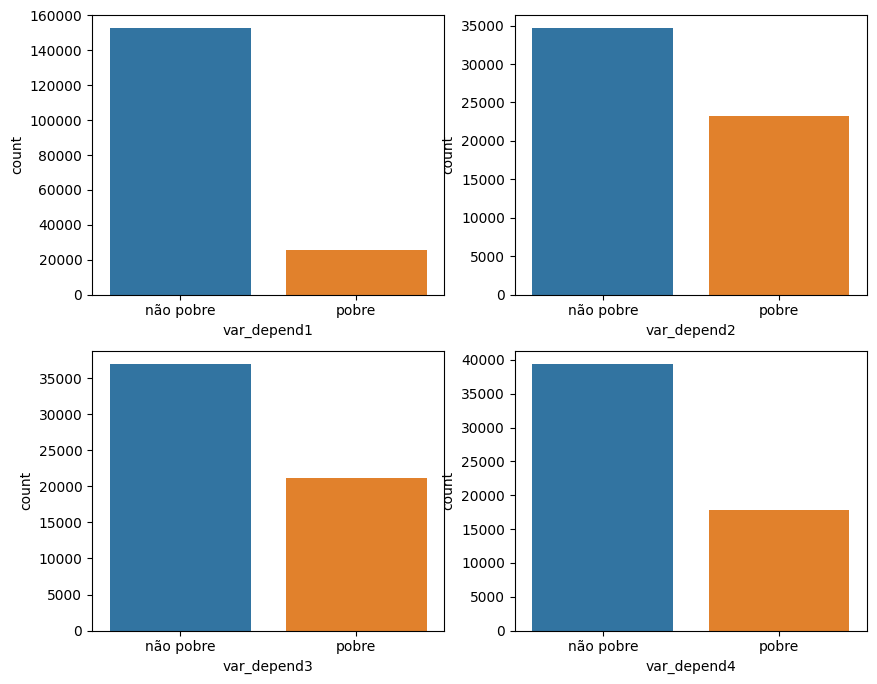

In [104]:
# grid das 4 variaveis
# plano
fig, eixos = mplt.subplots (2, 2, figsize=(10,8) )

# grafico1 = sn.countplot(MORADOR, x = 'var_depend1')
sn.countplot(MORADOR, x='var_depend1', ax=eixos[0,0])

# grafico2 = sn.countplot(DOMICILIO, x = 'var_depend2')
sn.countplot(DOMICILIO, x = 'var_depend2', ax=eixos[0,1])

# grafico3 = sn.countplot(CONDICOES_VIDA, x = 'var_depend3')
sn.countplot(CONDICOES_VIDA, x = 'var_depend3', ax= eixos[1,0])

# grafico4 = sn.countplot(DOMICILIO, x = 'var_depend4')
sn.countplot(DOMICILIO, x = 'var_depend4', ax= eixos[1,1])

mplt.show()

In [ ]:
# transferir para excel caso nao exceda o numero de linhas
# limite de linhas excel = 1.048.576 linhas e 16.384 colunas
# ex: CARACTERISTICAS_DIETA.to_excel('caracteristicas_dieta.xlsx', index=False)
# os itens de 'tabelas' e 'nome_tabelas' precisam estar alinhados

# x
tabelas = [ CARACTERISTICAS_DIETA,
            CONDICOES_VIDA,
            CONSUMO_ALIMENTAR,
            DOMICILIO,
            MORADOR,
            MORADOR_QUALI_VIDA ]

# i 
nomes_tabelas = [   'CARACTERISTICAS_DIETA',
                    'CONDICOES_VIDA',
                    'CONSUMO_ALIMENTAR',
                    'DOMICILIO',
                    'MORADOR',
                    'MORADOR_QUALI_VIDA' ]


# zip serve para fazer o loop ao mesmo tempo nas minhas duas listas
for x, i in zip(tabelas, nomes_tabelas):
    
    if len(x) < 1048576:
        print(f'{len(x)} , baixar: {i}')
        
        dados = pd.DataFrame(x)
        nome_arquivo = i +'.xlsx'
        dados.to_excel(nome_arquivo, index=False)
        
        print(f'arquivo {i} baixado com sucesso')
                    
    else:
        print(f'{len(x)} , nao baixar: {i}')
        
       
      

In [ ]:
# variaveis de cada tabela
# for x , i in zip(tabelas, nomes_tabelas):
#     dados_desc = pd.DataFrame(x).describe()
#     arquivo = pd.ExcelWriter('arquivo_estatisticas_descritivas.xlsx', engine = 'xlsxwriter')
#     dados_desc.to_excel(arquivo, sheet_name='{}'.format(i), index=True)
#     arquivo.save()

In [ ]:
# arquivos de dicionarios das variaveis
diretorio_dic = r'C:\Users\Computadores Gamer\OneDrive\Área de Trabalho\dados gradilene\dados'
diretorio_dic = diretorio_dic.replace('\\', '/')
os.chdir(diretorio_dic)

os.listdir()


In [ ]:
# sheets do arquivo dicionario
from openpyxl import load_workbook
dicionario = load_workbook('dicvar1718.xlsx')
sheets = dicionario.sheetnames
print(sheets) 


In [ ]:
# lendo sheet 'Morador' e mantendo apenas as variaveis 'V....'
# necessario generalizar esse codigo para cada sheet do arquivo


# morador = pd.read_excel('dicvar1718.xlsx', sheet_name='Morador')

# # cabecalho 
# morador.columns = morador.iloc[2,]

# # preenchendo elementos NAs da coluna 'Código da variável', senao a função 'startswith' nao funciona
# morador['Código da variável'].fillna('',inplace=True)

# # filtrar apenas linhas em que em 'Código da variável' o elemento começa com 'V'
# # lembrar que 'startswith' só funciona com o '.str'
# morador = morador[morador['Código da variável'].str.startswith('V')]        # filtrando apenas as linhas de codigos 'V....'
# print(morador)

In [ ]:
# generalizando codigo de ler cada sheet e filtrar apenas os codigos das variaveis
lista_tabelas_codigos = []

for i in sheets:
    caderno = pd.read_excel('dicvar1718.xlsx', sheet_name=i)
    caderno.columns = caderno.iloc[2,]
    caderno['Código da variável'].fillna('', inplace=True)
    caderno = caderno[caderno['Código da variável'].str.startswith('V')]
    lista_tabelas_codigos.append(caderno)


codigos_site = pd.concat(lista_tabelas_codigos, axis=0)
codigos_site = codigos_site[['Código da variável', 'Descrição']]
print(codigos_site)


In [ ]:
# vendo quantas variaveis de codigo tem em cada caderno para depois fazer o merge com a tabela 'codigos'
lista_cadernos = [CONSUMO_ALIMENTAR, CARACTERISTICAS_DIETA, DOMICILIO, CONDICOES_VIDA, MORADOR_QUALI_VIDA , MORADOR]

# colunas = CONSUMO_ALIMENTAR.columns.str.startswith('V')
# CONSUMO_ALIMENTAR.columns[np.where(colunas==True)]

codigos_total = []
for i in lista_cadernos:
    colunas = i.columns.str.startswith('V')
    nome = i.columns[np.where(np.logical_and(colunas, i.columns.str.match('.*[0-9]$')))] # logical_and é pra unir as condicoes. '.*[0-9]$' é uma expressao regular
    print(len(nome.unique()),nome)
    codigos_total.extend(nome) # coloca na lista, parecido com append, porem append é para adicionar um unico elemento no final da lista, o extend ja adiciona tudo de uma vez
    
    
codigos_cadernos = pd.DataFrame({'codigo':codigos_total})
codigos_cadernos.columns = ['Código da variável']
# codigos_cadernos.to_excel('codigos_cadernos.xlsx', index=False)

    

In [ ]:
# fazendo merge dos codigos que achei com os 207 codigos que sao o total de codigos de todos cadernos
codigos_final = pd.merge(codigos_site, codigos_cadernos, on='Código da variável', how = 'outer')
codigos_final = codigos_final[['Código da variável','Descrição']]
print(codigos_final)

codigos_final.to_excel('codigos_final.xlsx', index=False)